In [1]:
from subprocess import check_output
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [10]:
(trainX, trainY), (validateX, validateY) = fashion_mnist.load_data()

In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols)

**[CNN model - default Adam - no dropout]**

In [11]:
CNN_model_Adam = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(*image_shape, 1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

In [12]:
CNN_model_Adam.compile(loss ='sparse_categorical_crossentropy', optimizer="Adam", metrics =['accuracy'])

In [17]:
history_CNN_Adam = CNN_model_Adam.fit(trainX, trainY, batch_size = 4096, epochs = 75, verbose = 1, validation_data=(validateX, validateY))

Epoch 1/75
15/15 [==============================] - 28s 2s/step - loss: 0.7065 - accuracy: 0.7272 - val_loss: 0.8836 - val_accuracy: 0.7023
Epoch 2/75
15/15 [==============================] - 29s 2s/step - loss: 0.7080 - accuracy: 0.7255 - val_loss: 0.8564 - val_accuracy: 0.6984
Epoch 3/75
15/15 [==============================] - 27s 2s/step - loss: 0.6964 - accuracy: 0.7304 - val_loss: 0.8518 - val_accuracy: 0.7001
Epoch 4/75
15/15 [==============================] - 27s 2s/step - loss: 0.7036 - accuracy: 0.7263 - val_loss: 0.8663 - val_accuracy: 0.6921
Epoch 5/75
15/15 [==============================] - 27s 2s/step - loss: 0.6936 - accuracy: 0.7297 - val_loss: 0.8521 - val_accuracy: 0.7047
Epoch 6/75
15/15 [==============================] - 27s 2s/step - loss: 0.6867 - accuracy: 0.7333 - val_loss: 0.8437 - val_accuracy: 0.7047
Epoch 7/75
15/15 [==============================] - 27s 2s/step - loss: 0.6809 - accuracy: 0.7344 - val_loss: 0.8416 - val_accuracy: 0.7023
Epoch 8/75
15/15 [==

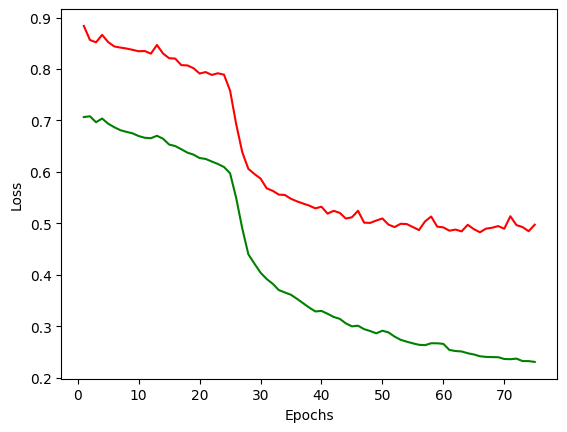

In [18]:
loss = history_CNN_Adam.history["loss"]
val_loss = history_CNN_Adam.history["val_loss"]
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(1,76), loss, "g", label = "Training Loss")
plt.plot(range(1,76), val_loss, "r", label = "Validation Loss")

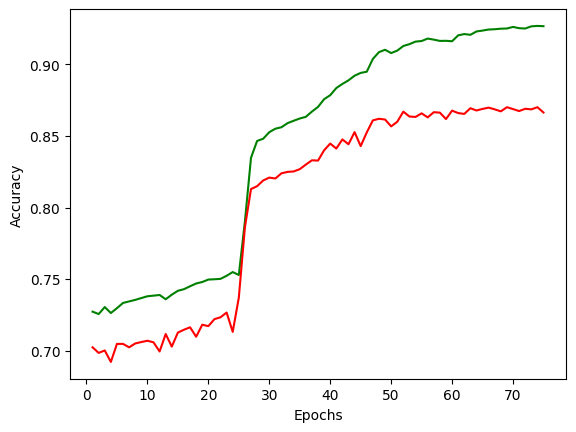

In [19]:
accuracy = history_CNN_Adam.history["accuracy"]
val_accuracy = history_CNN_Adam.history["val_accuracy"]
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(range(1,76), accuracy, "g", label = "Validation Accuracy")
plt.plot(range(1,76), val_accuracy, "r", label = "Validation Accuracy")